In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('Company_Data.csv')

In [3]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
sales_val = []
for value in data['Sales']:
    if value >= 7.5:
        sales_val.append('High')
    else:
        sales_val.append('Low')
data['Sales_category'] = sales_val

In [5]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_category
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [6]:
df = data.drop(['Sales'], axis=1)

In [7]:
df2 = df.copy()

<AxesSubplot:>

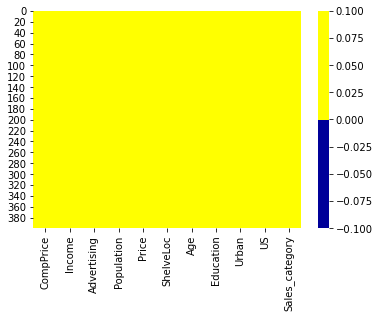

In [8]:
import seaborn as sns
cols = df2.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df2[cols].isnull(),
            cmap=sns.color_palette(colours))

In [9]:
# here is no null values

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['ShelveLoc']= label_encoder.fit_transform(df['ShelveLoc'])
df['Urban']= label_encoder.fit_transform(df['Urban'])
df['US']= label_encoder.fit_transform(df['US'])

In [11]:
df

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_category
0,138,73,11,276,120,0,42,17,1,1,High
1,111,48,16,260,83,1,65,10,1,1,High
2,113,35,10,269,80,2,59,12,1,1,High
3,117,100,4,466,97,2,55,14,1,1,Low
4,141,64,3,340,128,0,38,13,1,0,Low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,High
396,139,23,3,37,120,2,55,11,0,1,Low
397,162,26,12,368,159,2,40,18,1,1,Low
398,100,79,7,284,95,0,50,12,1,1,Low


In [12]:
import pandas_profiling as pp
import sweetviz as sv

In [13]:
# using pandas profiling and sweetviz for the visualization

In [14]:
EDA_report= pp.ProfileReport(df2)

In [15]:
EDA_report.to_file(output_file='company_data_EDA_report.html')

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
sweet_report = sv.analyze(df2)
sweet_report.show_html('company_data_EDA_report2.html')

                                             |                                             | [  0%]   00:00 ->…

Report company_data_EDA_report2.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [17]:
array = df.values
x= array[:,0:10]
y= array[:,10:]

In [18]:
x

array([[138, 73, 11, ..., 17, 1, 1],
       [111, 48, 16, ..., 10, 1, 1],
       [113, 35, 10, ..., 12, 1, 1],
       ...,
       [162, 26, 12, ..., 18, 1, 1],
       [100, 79, 7, ..., 12, 1, 1],
       [134, 37, 0, ..., 16, 1, 1]], dtype=object)

In [19]:
y

array([['High'],
       ['High'],
       ['High'],
       ['Low'],
       ['Low'],
       ['High'],
       ['Low'],
       ['High'],
       ['Low'],
       ['Low'],
       ['High'],
       ['High'],
       ['Low'],
       ['High'],
       ['High'],
       ['High'],
       ['High'],
       ['High'],
       ['High'],
       ['High'],
       ['Low'],
       ['High'],
       ['Low'],
       ['Low'],
       ['High'],
       ['High'],
       ['High'],
       ['Low'],
       ['Low'],
       ['High'],
       ['High'],
       ['High'],
       ['Low'],
       ['High'],
       ['Low'],
       ['High'],
       ['High'],
       ['Low'],
       ['Low'],
       ['Low'],
       ['Low'],
       ['High'],
       ['High'],
       ['Low'],
       ['Low'],
       ['Low'],
       ['High'],
       ['Low'],
       ['Low'],
       ['High'],
       ['Low'],
       ['Low'],
       ['High'],
       ['Low'],
       ['Low'],
       ['Low'],
       ['High'],
       ['Low'],
       ['Low'],
       ['Low'],
       ['H

In [20]:
kfold = KFold( n_splits=6, random_state=None)

 Model 1 using Random forest and categorizing sales values as High and Low

In [21]:
model= RandomForestClassifier(n_estimators=100,max_features=6)
results= cross_val_score(model, x, y.ravel(), cv=kfold)    
print(results.mean())

0.8150158299412031


In [22]:
# accuracy is 81%

Model 2 using Esemble Methods and categorizing sales values as High and Low

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [24]:
import warnings
warnings.filterwarnings("ignore")

In [25]:
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

In [26]:
ensemble = VotingClassifier(estimators)
results2 = cross_val_score(ensemble, x, y, cv=kfold)
print(results2.mean())

0.7898763756972712


In [27]:
# accuracy = 78%

In [28]:
# categorizing Sales value as High , Mid and Low

In [29]:
sales_val2 = []
for value in data['Sales']:
    if value >= 9:
        sales_val2.append('High')
    elif value >= 6 and value < 9:
        sales_val2.append('Mid')
    else:
        sales_val2.append('Low')
df['Sales_category2'] = sales_val2

In [30]:
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_category,Sales_category2
0,138,73,11,276,120,0,42,17,1,1,High,High
1,111,48,16,260,83,1,65,10,1,1,High,High
2,113,35,10,269,80,2,59,12,1,1,High,High
3,117,100,4,466,97,2,55,14,1,1,Low,Mid
4,141,64,3,340,128,0,38,13,1,0,Low,Low


In [31]:
array2= df.values
x2=array[:,0:10]
y2=array[:,10:]

In [32]:
x2

array([[138, 73, 11, ..., 17, 1, 1],
       [111, 48, 16, ..., 10, 1, 1],
       [113, 35, 10, ..., 12, 1, 1],
       ...,
       [162, 26, 12, ..., 18, 1, 1],
       [100, 79, 7, ..., 12, 1, 1],
       [134, 37, 0, ..., 16, 1, 1]], dtype=object)

In [33]:
y2

array([['High'],
       ['High'],
       ['High'],
       ['Low'],
       ['Low'],
       ['High'],
       ['Low'],
       ['High'],
       ['Low'],
       ['Low'],
       ['High'],
       ['High'],
       ['Low'],
       ['High'],
       ['High'],
       ['High'],
       ['High'],
       ['High'],
       ['High'],
       ['High'],
       ['Low'],
       ['High'],
       ['Low'],
       ['Low'],
       ['High'],
       ['High'],
       ['High'],
       ['Low'],
       ['Low'],
       ['High'],
       ['High'],
       ['High'],
       ['Low'],
       ['High'],
       ['Low'],
       ['High'],
       ['High'],
       ['Low'],
       ['Low'],
       ['Low'],
       ['Low'],
       ['High'],
       ['High'],
       ['Low'],
       ['Low'],
       ['Low'],
       ['High'],
       ['Low'],
       ['Low'],
       ['High'],
       ['Low'],
       ['Low'],
       ['High'],
       ['Low'],
       ['Low'],
       ['Low'],
       ['High'],
       ['Low'],
       ['Low'],
       ['Low'],
       ['H

Model 3 using Random forest and categorizing sales values as High , Mid and Low

In [34]:
model3= RandomForestClassifier(n_estimators=100,max_features=6)
results3= cross_val_score(model3, x2, y2, cv=kfold)    
print(results3.mean())

0.8025403286597316


In [35]:
# accuracy of model 3 is 82%

Model 4 using Esemble Methods and categorizing sales values as High , Mid and Low

In [36]:
ensemble2 = VotingClassifier(estimators)
results4 = cross_val_score(ensemble2, x, y, cv=kfold)
print(results2.mean())

0.7898763756972712


In [37]:
# accuracy is 78%

In [38]:
# We are getting the best accuracy in Model 3